# **Predicción de Costos Médicos**


El objetivo de este análisis es investigar una variedad de factores relacionados con la salud y sus interconexiones para predecir con precisión los costos médicos individuales facturados por el seguro de salud. Estos factores incluyen aspectos como la **edad, el género, el índice de masa corporal (IMC), el número de hijos, el estado de fumador y la región.** Este examen exhaustivo no solo proporcionará ideas sobre los patrones y **tendencias en los cargos del seguro de salud,** sino que también creará una base sólida para investigaciones adicionales. Específicamente, la investigación puede construirse en cómo estas variables interactúan e influyen en el costo del seguro de salud, conocimiento crucial para mejorar el diseño de políticas de seguro y los resultados en esta área de atención médica cada vez más crítica.

### **Descripcion del conjunto de datos**

**1. Age:** La edad es un factor significativo en el seguro de salud, ya que las personas mayores generalmente tienen un mayor riesgo de problemas de salud en comparación con las personas más jóvenes. Por lo tanto, la edad a menudo se correlaciona con cargos de seguro más altos.

**2. Sex:** El género puede influir en los costos del seguro de salud. Algunos estudios sugieren que las mujeres tienden a utilizar más servicios de atención médica, especialmente durante los años de reproducción. Sin embargo, el impacto del género en los cargos del seguro de salud puede variar dependiendo de otros factores.

**3. BMI (Índice de Masa Corporal):** El BMI es una medida que intenta cuantificar la masa de tejido de un individuo. Se utiliza ampliamente como un método simple para evaluar si una persona tiene un peso corporal saludable para una altura dada. Los valores altos de BMI a menudo se asocian con un mayor riesgo de enfermedades crónicas como enfermedades cardíacas, diabetes y ciertos tipos de cáncer, lo que puede llevar a costos más altos de atención médica.

**4. Children:** El número de dependientes que una persona tiene puede influir en los costos del seguro de salud. Más dependientes generalmente significan cargos de seguro más altos porque más personas están cubiertas bajo el mismo plan.

**5. Smoker:** Fumar es un factor de riesgo significativo para muchas enfermedades, incluyendo enfermedades cardíacas, derrames cerebrales y cáncer. Los fumadores a menudo enfrentan cargos de seguro de salud más altos debido a estos mayores riesgos para la salud.

**6. Region:** La región donde vive el beneficiario también puede afectar los cargos del seguro de salud. Esto podría deberse a variaciones en el costo de vida, los costos de atención médica y los comportamientos de salud en diferentes regiones.

**7. Charges:** Estos son los costos médicos individuales facturados por el seguro de salud. Es la variable dependiente en este conjunto de datos, y está influenciada por todos los demás factores. Comprender las relaciones entre las variables independientes (Age, Sex, BMI, Children, Smoker, Region) y Charges es el objetivo principal de este análisis.

**✔️ Estas variables, cuando se combinan y se analizan con técnicas estadísticas y de aprendizaje automático apropiadas, pueden ayudar a predecir los costos médicos de un individuo.**

# **1. Introducción**


**1.1 Resumen**

Este proyecto emplea un enfoque integral de aprendizaje automático para predecir los costos médicos individuales utilizando un conjunto de datos diverso de beneficiarios de seguros de salud de los Estados Unidos. El conjunto de datos comprende variables **demográficas y relacionadas con la salud, incluyendo edad, género, Índice de Masa Corporal (IMC)**, número de dependientes, estado de fumador y región de residencia. Se desarrolla y ajusta un modelo robusto de Regresión con Impulso de Gradiente para predecir con precisión los cargos médicos a partir de estas características.

El proyecto incorpora un amplio **análisis exploratorio de datos (EDA)** de los cargos médicos para comprender la estructura de los datos, las relaciones entre variables y las percepciones preliminares sobre los factores que influyen en los cargos médicos. Se aplica **Análisis de Componentes Principales (PCA)** para **reducir la dimensionalidad y enfocarse en las combinaciones más importantes de características**, lo que mejora la interpretabilidad y eficiencia del modelo.

También se realiza **agrupamiento K-means** para identificar grupos distintos dentro de los beneficiarios, lo que proporciona una comprensión más profunda del conjunto de datos y revela posibles patrones en los cargos médicos. Estos grupos también podrían informar modelos de predicción más personalizados o intervenciones en el futuro.

El rendimiento del modelo se evalúa utilizando una variedad de métricas, incluyendo **Error Absoluto Medio (MAE), Error Cuadrático Medio (MSE), Error Cuadrático Medio Raíz (RMSE), R-cuadrado (R2), Error Logarítmico Medio Cuadrático Raíz (RMSLE) y Error Porcentual Absoluto Medio (MAPE)**. El uso de **validación cruzada** de 10 pliegues garantiza una evaluación robusta del rendimiento y la generalización a datos no vistos.

Se investiga la importancia de las características para iluminar los principales impulsores de los costos médicos, con el estado de fumador, el IMC y la edad emergiendo como factores clave. Esta valiosa información puede informar políticas de salud, evaluación de riesgos y toma de decisiones individuales en torno a comportamientos de salud y cobertura de seguros.

**1.2 Cargamos las librerias necesarias**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

#Importamos librerias de visualizacion

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from sklearn.manifold import TSNE
from math import sqrt
from scipy.stats import probplot
from sklearn.manifold import TSNE

**1.3 Cargamos el conjunto de datos**

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **2. Análisis de datos exploratorio (EDA)**

### **2.1 Calidad de los datos**

**Manejo de los datos duplicados**

In [4]:
duplicated_rows = df[df.duplicated()]
print("number of duplicate rows: ", duplicated_rows.shape)

number of duplicate rows:  (1, 7)


In [5]:
df = df.drop_duplicates()

**Manejo de los datos unicos**

In [6]:
#Realizamos un loop por todas las columnas para contar los valores distintos de cada una

for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

age: 47 distinct values
sex: 2 distinct values
bmi: 548 distinct values
children: 6 distinct values
smoker: 2 distinct values
region: 4 distinct values
charges: 1337 distinct values


**Manejo de valores faltantes**

In [7]:
#Chequeamos los valores faltantes

print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


**Descripción estadística del conjunto de datos**

In [8]:
df.describe().style.format("{:.2f}")

,age,bmi,children,charges
count,1337.00,1337.00,1337.00,1337.00
mean,39.22,30.66,1.10,13279.12
std,14.04,6.10,1.21,12110.36
min,18.00,15.96,0.00,1121.87
25%,27.00,26.29,0.00,4746.34
50%,39.00,30.40,1.00,9386.16
75%,51.00,34.70,2.00,16657.72
max,64.00,53.13,5.00,63770.43


### **2.2 Análisis Univariado**

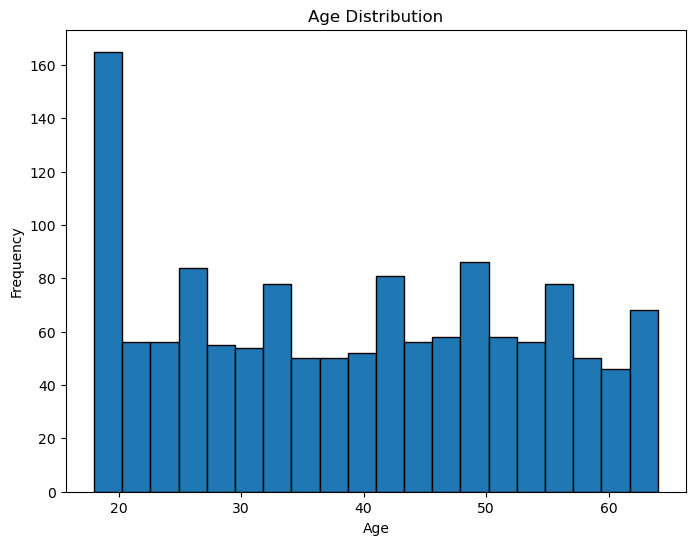

In [9]:
#Histograma para la distribucion de edad

plt.figure(figsize=(8,6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

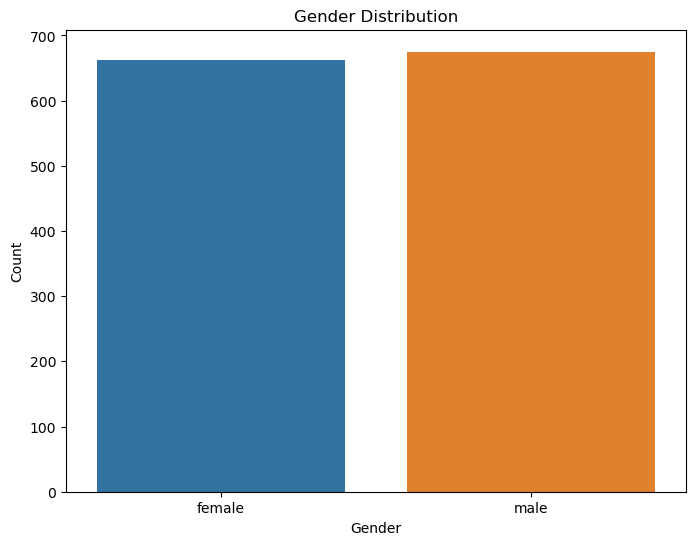

In [10]:
#Gráfico de barra para la distribucion de edad.

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='sex')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

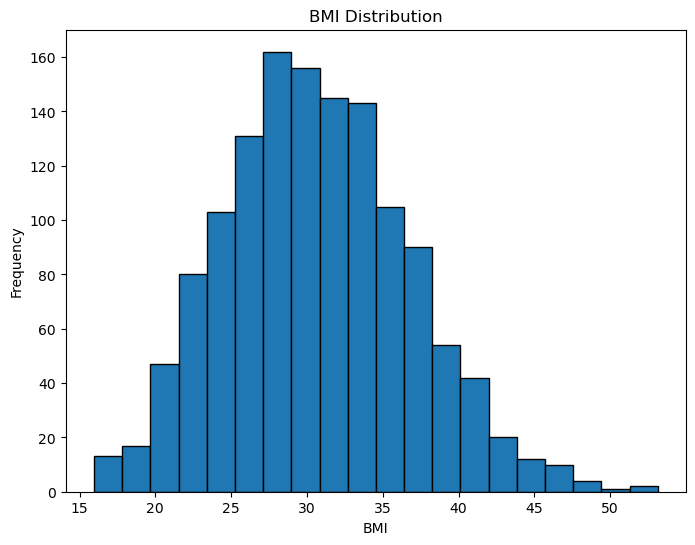

In [11]:
#Histograma para los valores de BMI

plt.figure(figsize=(8,6))
plt.hist(df['bmi'], bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

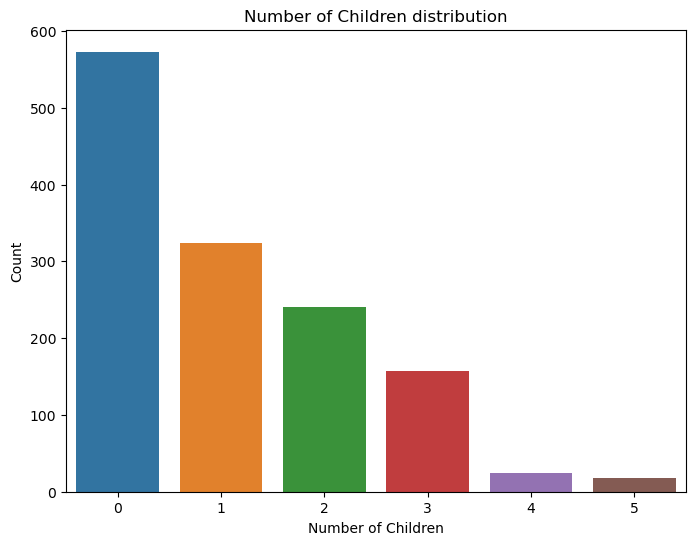

In [12]:
#Gráfico de barra para cantidad de hijos/dependientes

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Number of Children distribution')
plt.show()

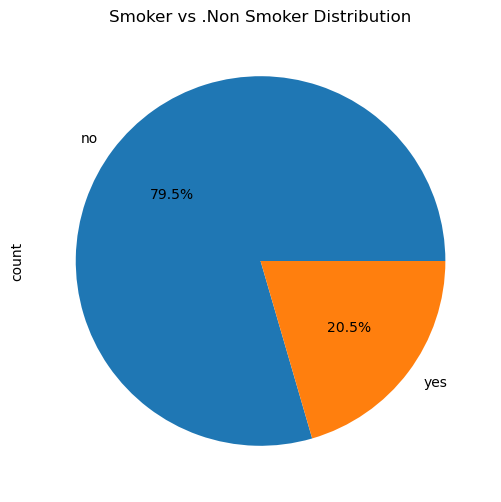

In [13]:
#Grafico de torta para ver la distribucion de los fumadores

plt.figure(figsize=(8,6))
df['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Smoker vs .Non Smoker Distribution')
plt.show()

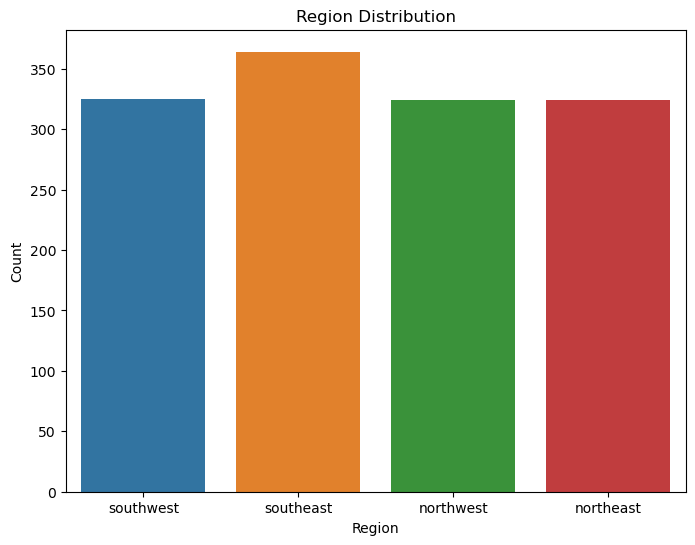

In [14]:
#Grafico de barra para distribucion de region

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')
plt.show()

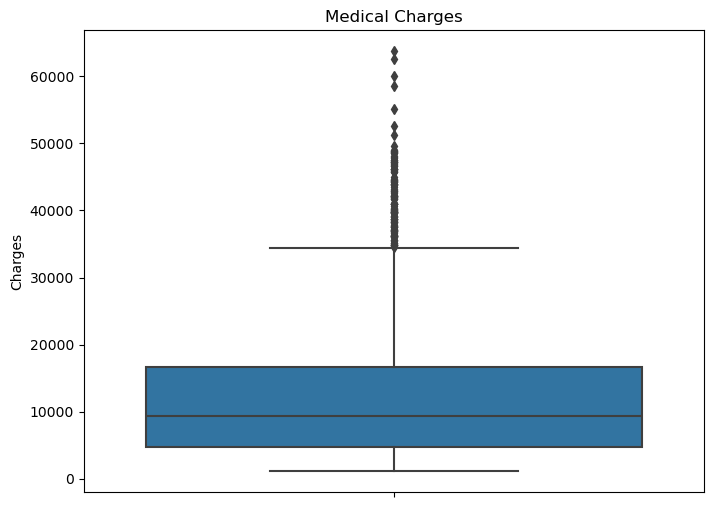

In [15]:
#Grafico de caja para los cargos medicos cobrados

plt.figure(figsize=(8,6))
sns.boxplot(data=df, y='charges')
plt.ylabel('Charges')
plt.title('Medical Charges')
plt.show()

### **2.3 Análisis Bivariado**

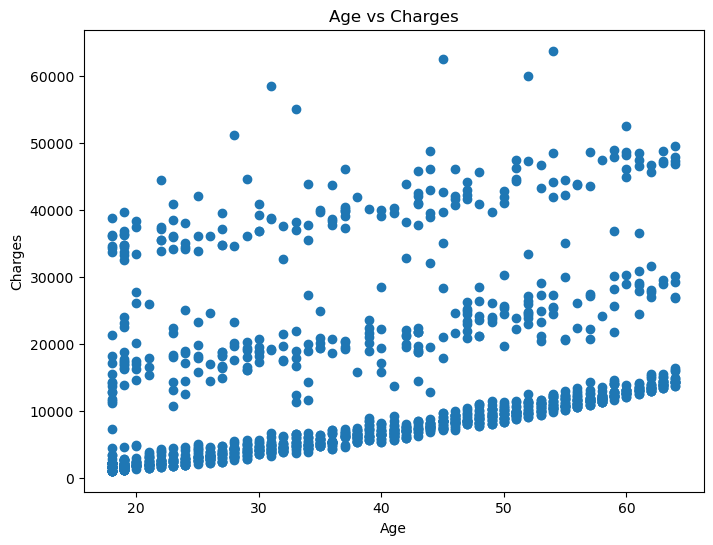

In [16]:
#Grafico de dispersion para Age vs Charges

plt.figure(figsize=(8,6))
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()

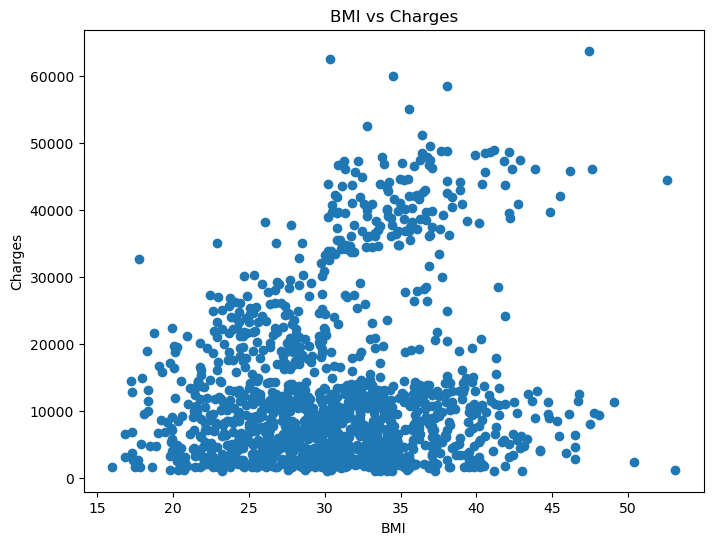

In [17]:
#Gráfico de dispersión para BMI vs Charges

plt.figure(figsize=(8,6))
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')
plt.show()

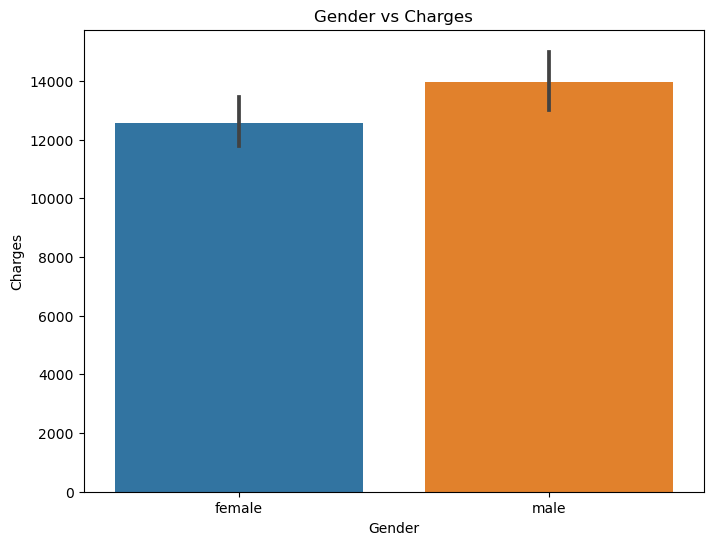

In [18]:
#Gráfico de barras apiladas para Gender vs Charges

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='sex', y='charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Gender vs Charges')
plt.show()

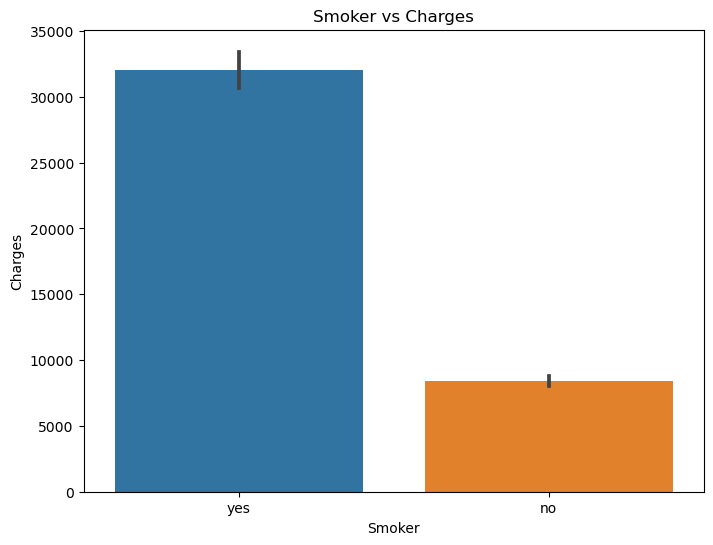

In [19]:
#Gráfico de barras apiladas para Smoker vs Charges

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker vs Charges')
plt.show()

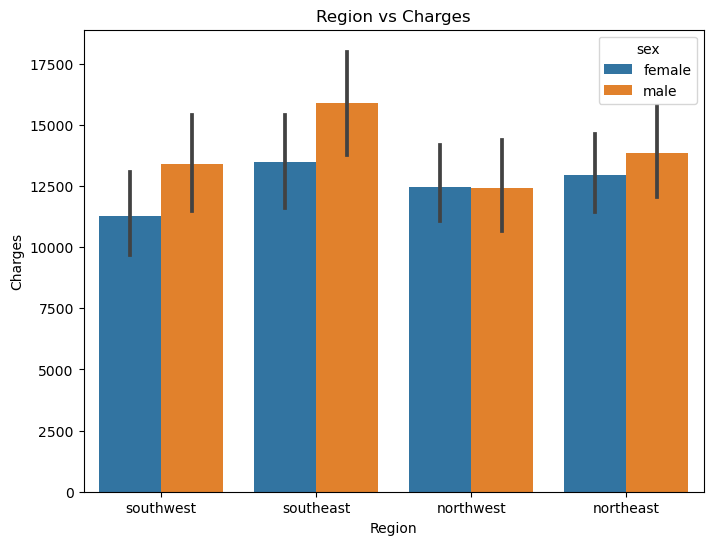

In [20]:
#Gráfico de barras apiladas para Region vs Charges

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='region', y='charges', hue='sex')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs Charges')
plt.show()

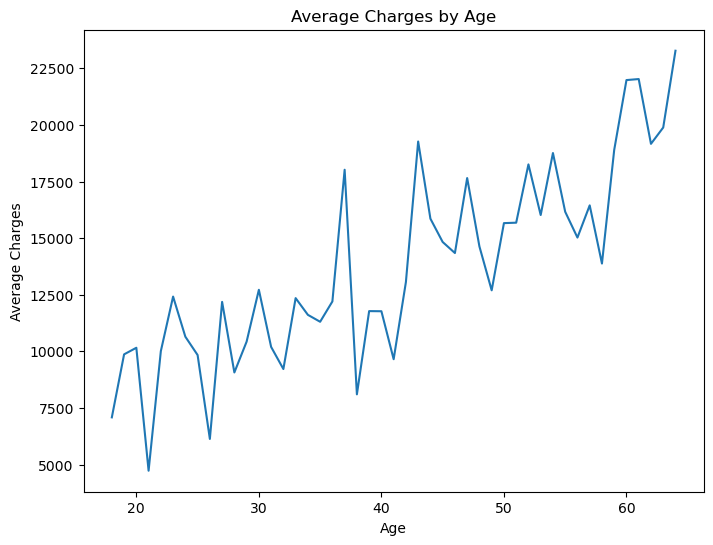

In [21]:
#Grafico de linea para el promedio de cargos por edad

avg_charges_by_age = df.groupby('age')['charges'].mean()
plt.figure(figsize=(8,6))
plt.plot(avg_charges_by_age.index, avg_charges_by_age.values)
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age')
plt.show()

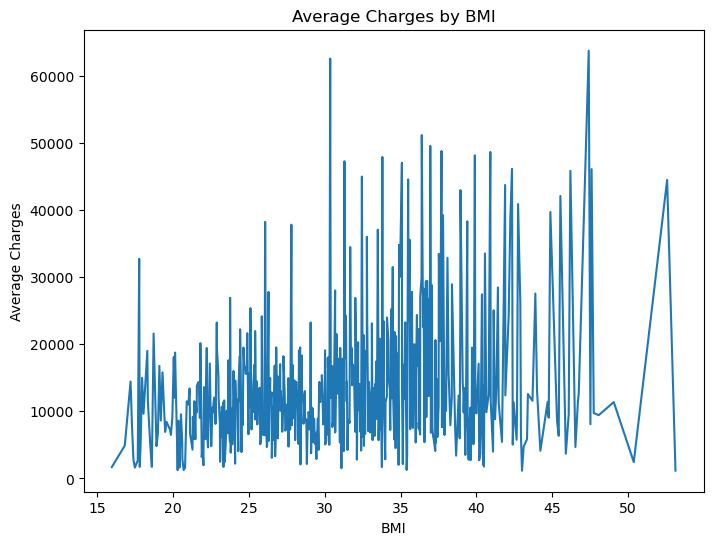

In [22]:
#Grafico de linea para el promedio de cargos por BMI

avg_charges_by_age = df.groupby('bmi')['charges'].mean()
plt.figure(figsize=(8,6))
plt.plot(avg_charges_by_age.index, avg_charges_by_age.values)
plt.xlabel('BMI')
plt.ylabel('Average Charges')
plt.title('Average Charges by BMI')
plt.show()

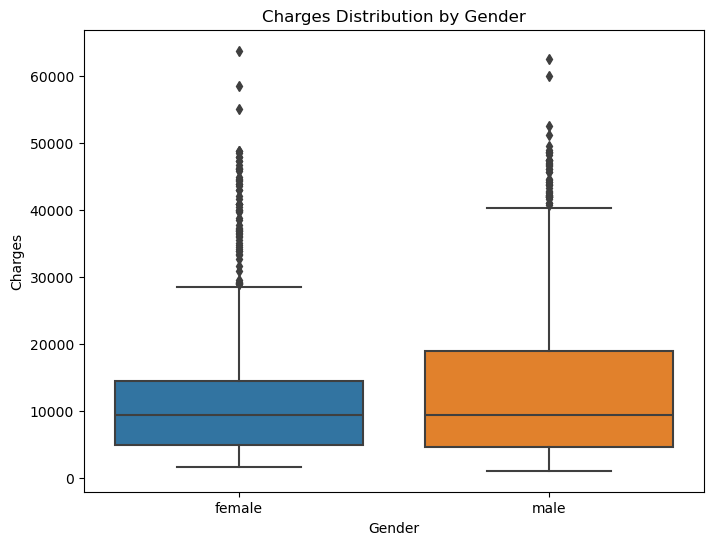

In [23]:
#Grafico de caja para cargos segun el sexo

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='sex',y='charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Charges Distribution by Gender')
plt.show()

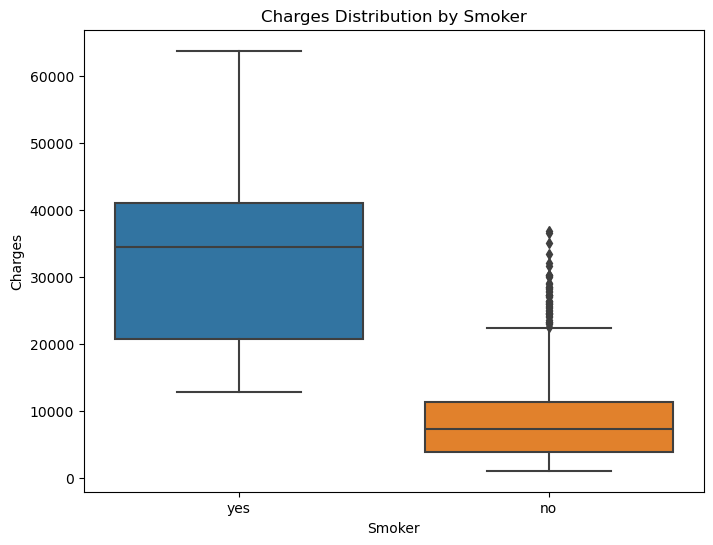

In [24]:
#Grafico de caja para cargos segun persona fumadora o no

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='smoker',y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution by Smoker')
plt.show()

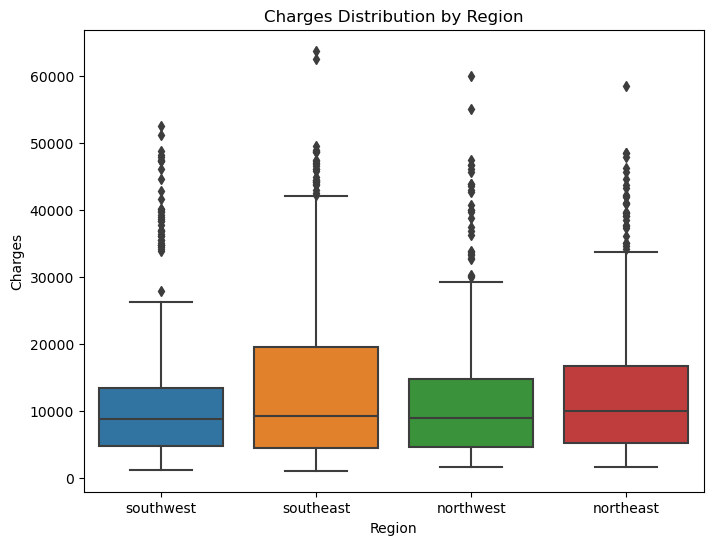

In [25]:
#Grafico de caja para cargos segun Region

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='region',y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution by Region')
plt.show()

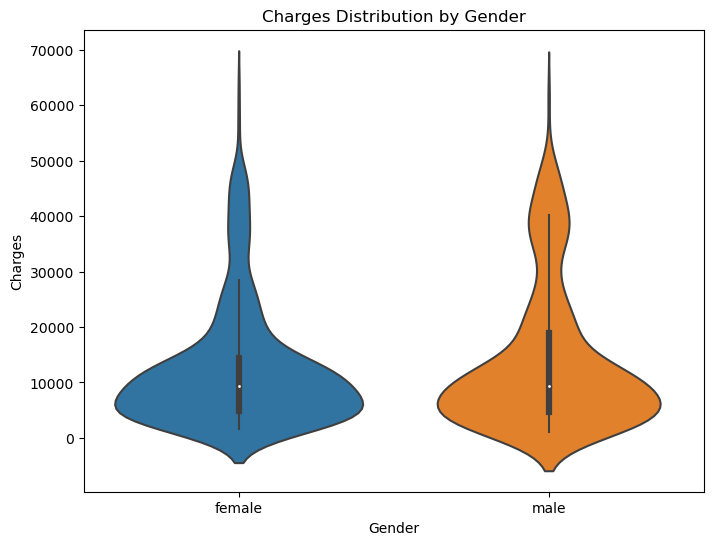

In [26]:
#Grafico de violin para cargos segun el genero

plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='sex',y='charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Charges Distribution by Gender')
plt.show()

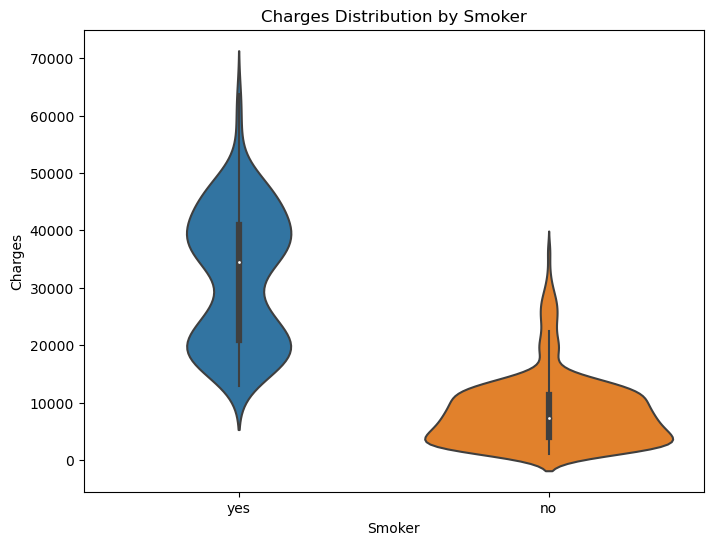

In [27]:
#Grafico de violin para cargos segun persona fumadora

plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='smoker',y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution by Smoker')
plt.show()

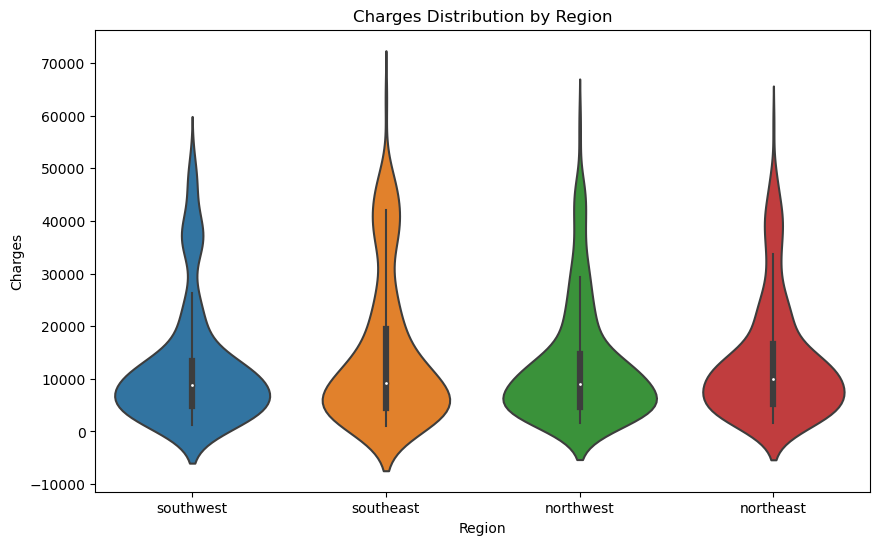

In [28]:
#Grafico de violin para cargos segun Region

plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='region',y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution by Region')
plt.show()

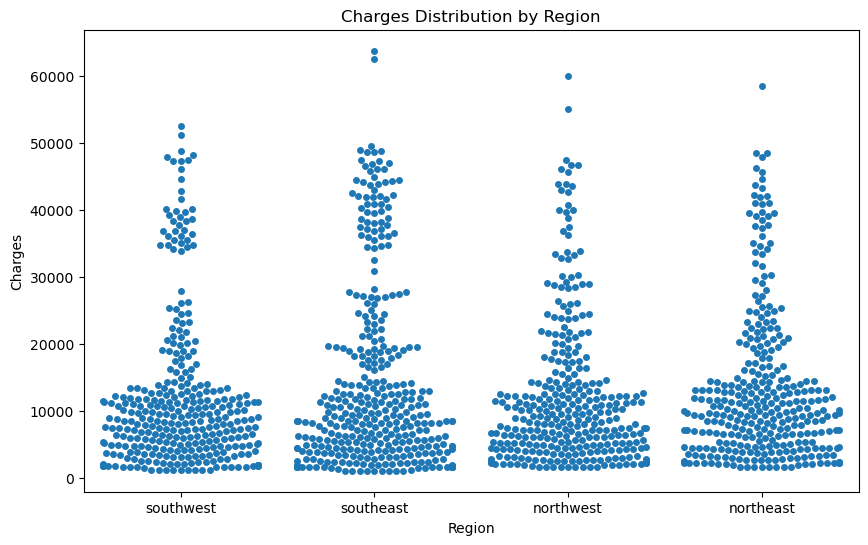

In [29]:
#Grafico de enjambre para cargos segun region

plt.figure(figsize=(10,6))
sns.swarmplot(data=df, x='region',y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution by Region')
plt.show()

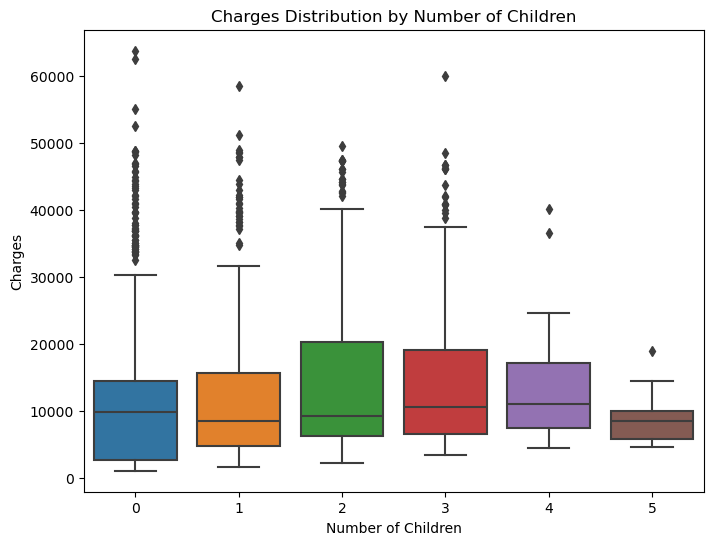

In [30]:
#Grafico de caja para cargos segun numero de hijos/dependientes

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='children', y='charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.title('Charges Distribution by Number of Children')
plt.show()

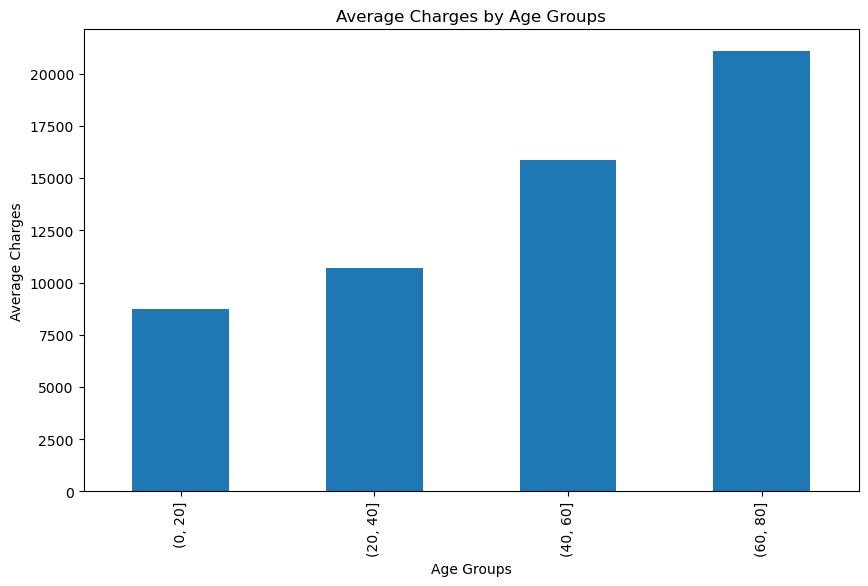

In [31]:
#Grafico de caja para cargos promedio segun rango de edad

age_groups = pd.cut(df['age'], bins=[0,20,40,60,80])
avg_charges_by_age_groups = df.groupby(age_groups)['charges'].mean()
plt.figure(figsize=(10,6))
avg_charges_by_age_groups.plot(kind='bar')
plt.xlabel('Age Groups')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age Groups')
plt.show()

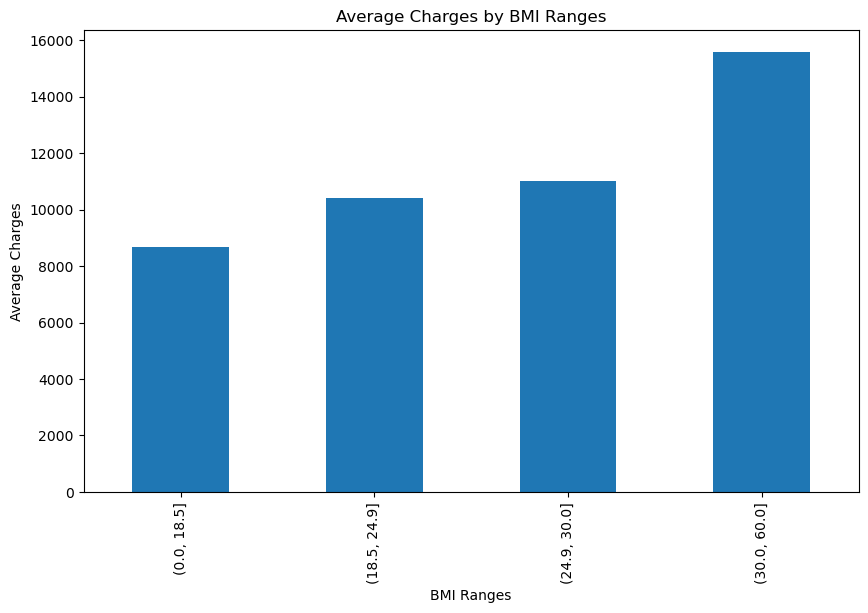

In [32]:
#Grafico de barra para cargos promedios segun rango de BMI

bmi_ranges = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 30, 60])
avg_charges_by_bmi_ranges = df.groupby(bmi_ranges)['charges'].mean()
plt.figure(figsize=(10, 6))
avg_charges_by_bmi_ranges.plot(kind='bar')
plt.xlabel('BMI Ranges')
plt.ylabel('Average Charges')
plt.title('Average Charges by BMI Ranges')
plt.show()

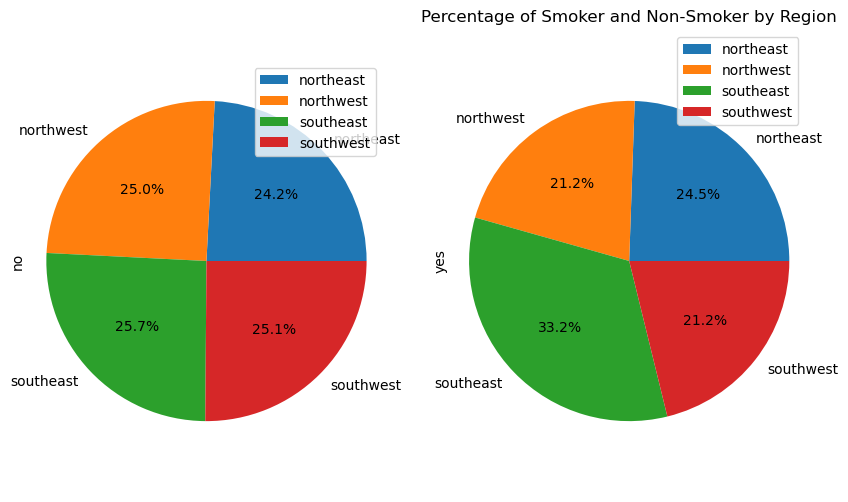

In [33]:
#Grafico de torta con porcentaje segun persona fumadora y region

region_smoker_counts = df.groupby(['region','smoker']).size().unstack()
region_smoker_counts.plot(kind='pie', figsize=(10,6), autopct='%1.1f%%', subplots=True)
plt.legend(loc='upper right')
plt.title('Percentage of Smoker and Non-Smoker by Region')
plt.axis('equal')
plt.show()

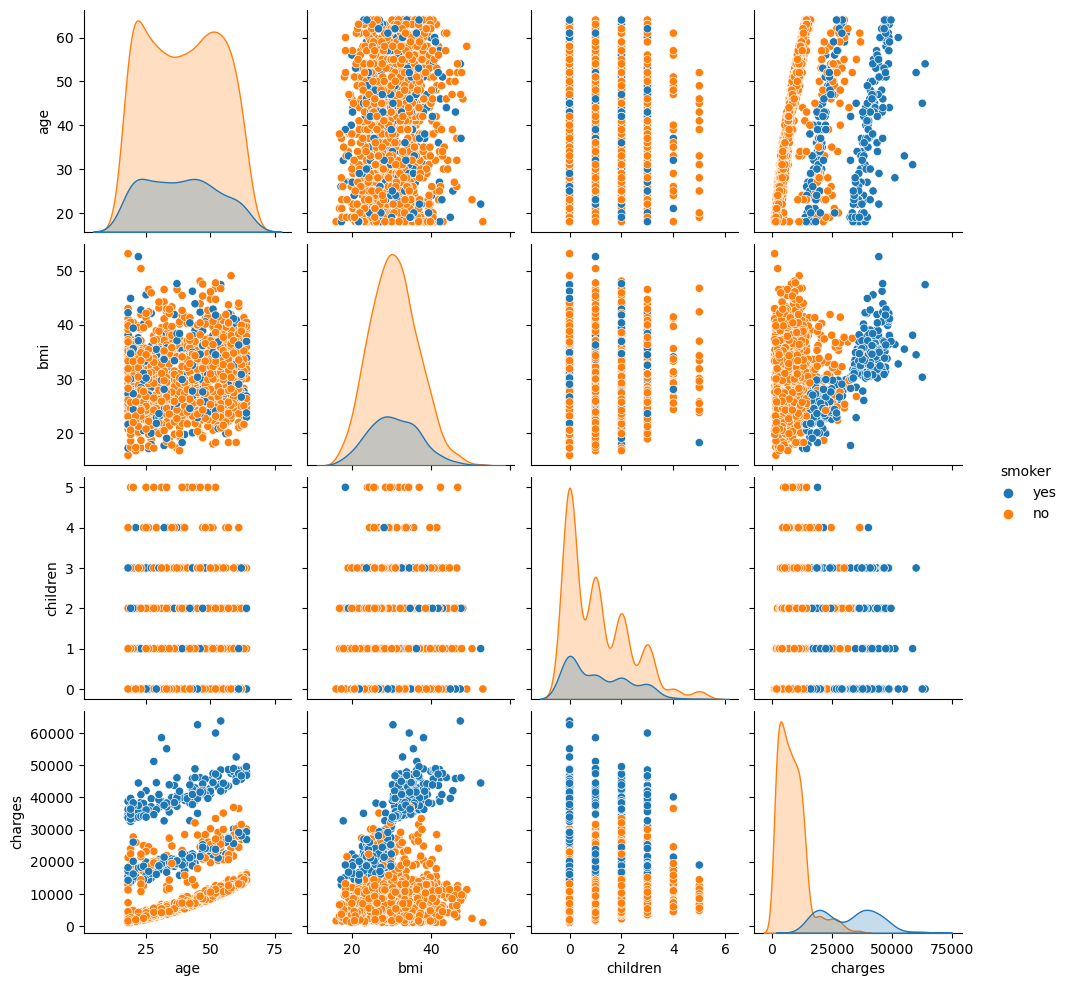

In [34]:
#Grafico de pares

sns.pairplot(df, hue='smoker')
plt.show()

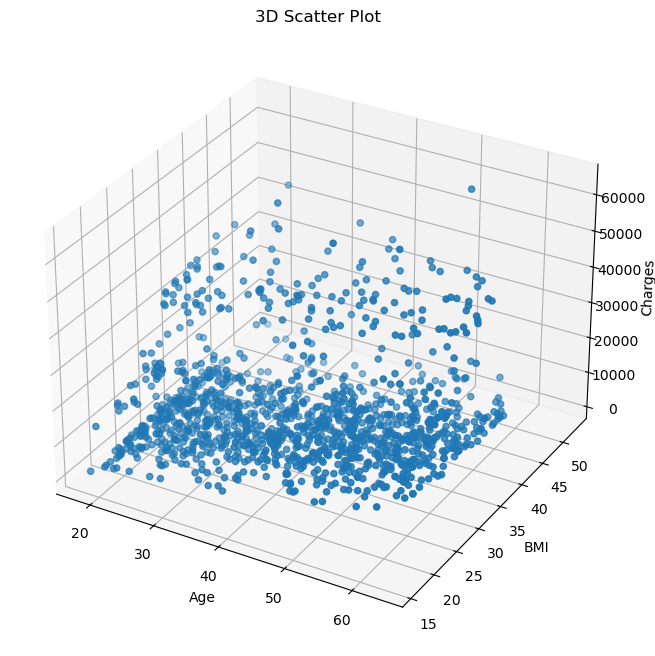

In [35]:
#Grafico de distribucion dimensional 3D

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['bmi'], df['charges'])
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')
plt.title('3D Scatter Plot')
plt.show()

### **2.4 Análisis Multivariado**

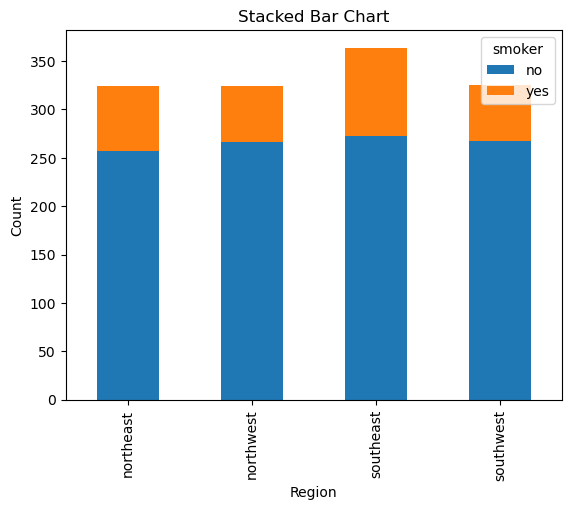

In [36]:
#Grafico de barra apilado segun region y persona fumadora 

stacked_data = df.groupby(['region', 'smoker']).size().unstack()
stacked_data.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Stacked Bar Chart')
plt.show()

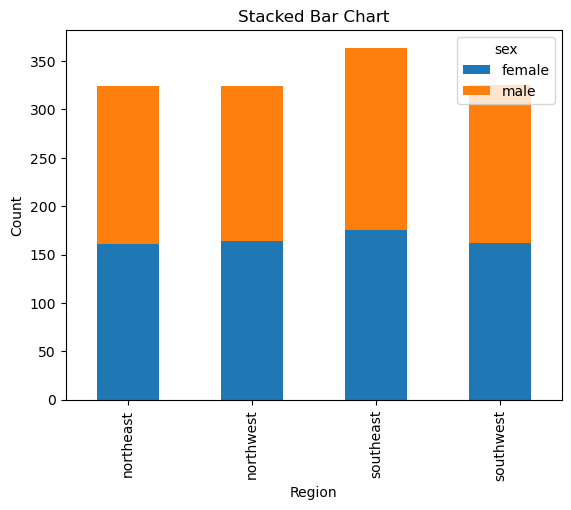

In [37]:
#Grafico de barra segun region y genero

stacked_data = df.groupby(['region', 'sex']).size().unstack()
stacked_data.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Stacked Bar Chart')
plt.show()

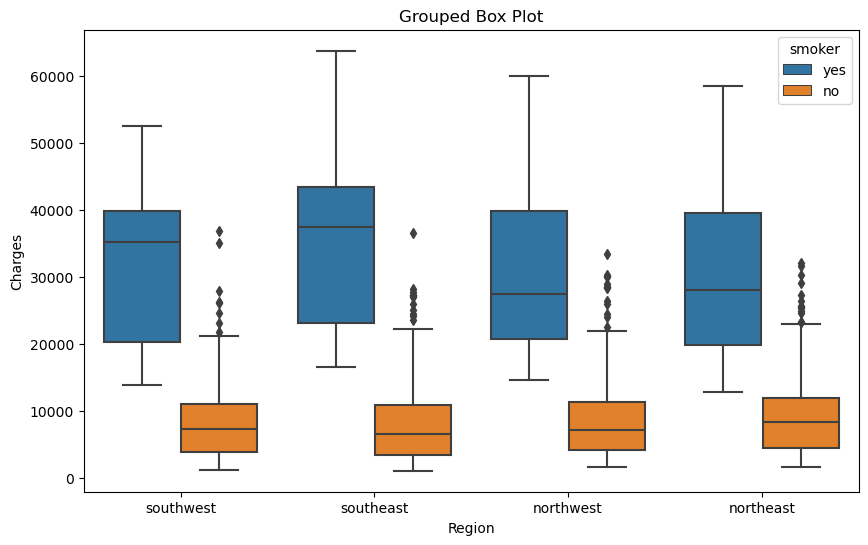

In [38]:
# Grafico de caja agrupada segun region y persona fumadora

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='charges', hue='smoker')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Grouped Box Plot')
plt.show()

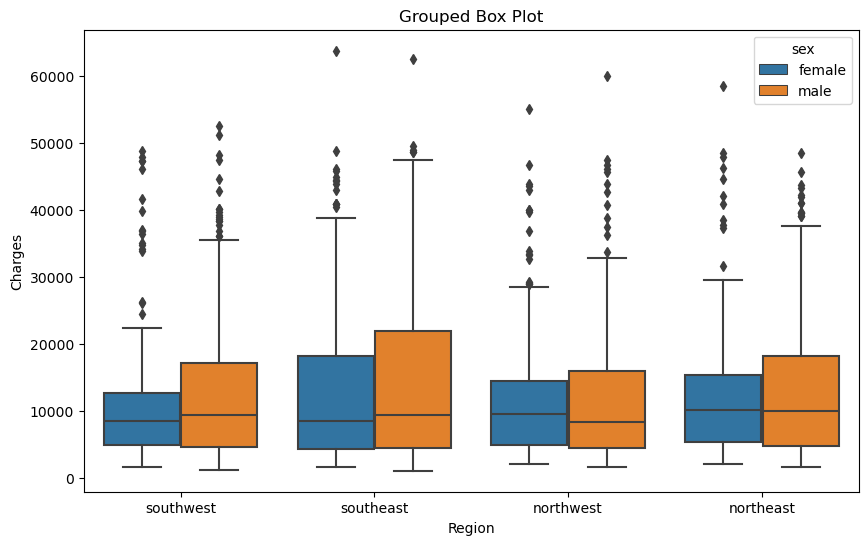

In [39]:
# Grafico de caja agrupada segun region y genero

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='charges', hue='sex')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Grouped Box Plot')
plt.show()

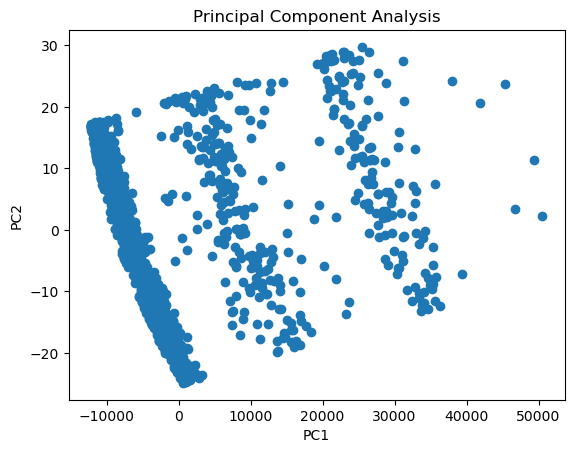

In [40]:
#Análisis de Componentes Principales (PCA)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[['age','bmi','charges']])
df_pca = pd.DataFrame(data=principal_components, columns=['PC1','PC2'])
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Analysis')
plt.show()

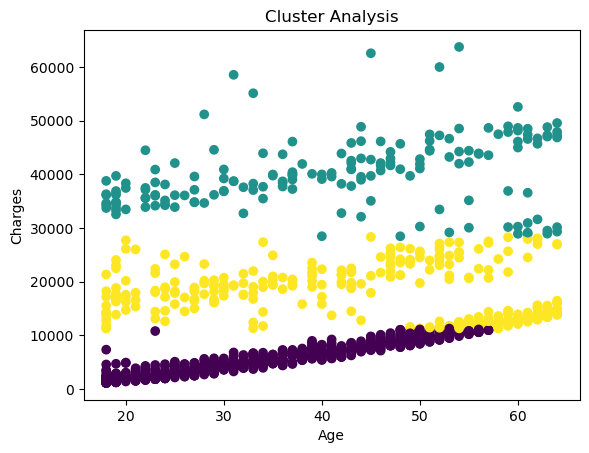

In [41]:
#Análisis de Cluster

features = ['age', 'bmi', 'charges']
X = df[features]
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X)
plt.scatter(df['age'], df['charges'], c=df['cluster'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Cluster Analysis')
plt.show()

# **3. Matriz de Correlación**

### **Ajustamos las columnas**

In [42]:
data = df.copy()

In [43]:
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})


In [44]:
data.head()

,age,sex,bmi,children,smoker,region,charges,cluster
0,19,female,27.900,0,1,southwest,16884.92400,2
1,18,male,33.770,1,0,southeast,1725.55230,0
2,28,male,33.000,3,0,southeast,4449.46200,0
3,33,male,22.705,0,0,northwest,21984.47061,2
4,32,male,28.880,0,0,northwest,3866.85520,0


In [45]:
categorical_columns = ['region','sex']
numerical_columns = ['age','bmi','children','smoker','charges']
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

### **Preprocesamiento: Escalado de datos**

El preprocesamiento es un paso crucial antes de entrenar el modelo. En este caso, las características numéricas se estandarizan *(se elimina la media y se escalan a varianza unitaria)*, y las características categóricas se codifican mediante **one-hot encoding.** La **estandarización** no es necesaria para todos los modelos, pero generalmente es una buena práctica. La codificación **one-hot** es necesaria para que las variables categóricas sean comprendidas correctamente por el modelo de aprendizaje automático.

El **StandardScaler** en sklearn se basa en la suposición de que los datos, Y, siguen una distribución que no necesariamente es Gaussiana (normal), pero aún así lo transformamos de manera que su distribución tenga un valor medio de 0 y una desviación estándar de 1.



In [46]:
scaler = StandardScaler()

#Realizamos el escalamiento de las variables numericas
scaled_numerical = scaler.fit_transform(data[numerical_columns])

#Convertimos a las variables numericas escaladas
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [47]:
#Eliminamos las variables numericas origniales
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

#Concatenamos las variables dummies y las variables numericas escaladas
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

### **Matriz de correlación**

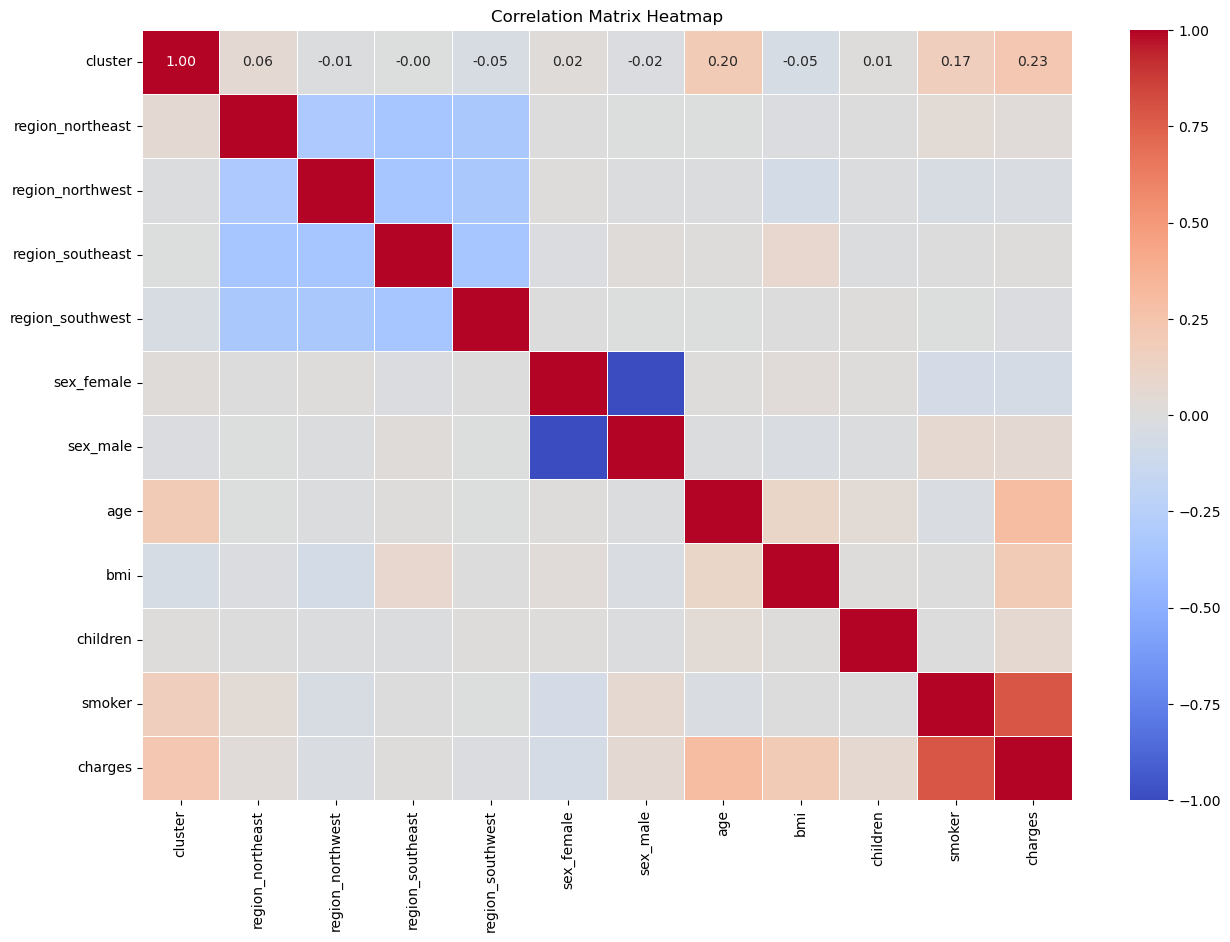

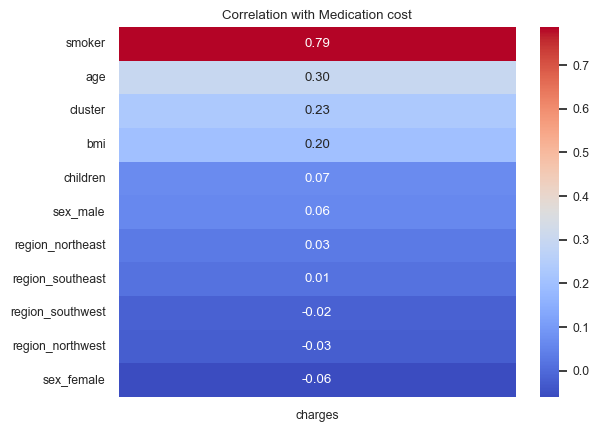

In [48]:
correlation_matrix = processed_df.corr()

#Grafico 1

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = processed_df.corr()
target_corr = corr['charges'].drop('charges')

#Ordenamos los valores de la correlacion
target_corr_sorted = target_corr.sort_values(ascending=False)

#Grafico 2

#Creamos un mapa de calor con las correlaciones y la variable objetivo

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title("Correlation with Medication cost")
plt.show()

**Análisis de los resultados:**


Estos coeficientes de correlación representan la relación entre cada variable y la variable de **Charges.** Una correlación positiva indica que a medida que la variable aumenta, los cargos también tienden a aumentar. Una correlación negativa indica que a medida que la variable aumenta, los cargos tienden a disminuir.

* **Smoker:** Con una correlación de 0.787251, esta es la variable más fuertemente correlacionada positivamente con los cargos. Esto sugiere que los fumadores tienden a tener costos médicos más altos, lo cual es consistente con el hecho de que fumar es un factor de riesgo significativo para muchas condiciones de salud.

* **Age:** Esta variable tiene una correlación positiva moderada de 0.299008 con los cargos. Esto sugiere que las personas mayores tienden a tener costos médicos más altos, probablemente debido al mayor riesgo de problemas de salud con la edad.

* **BMI:** Esta variable tiene una correlación positiva débil de 0.198341 con los cargos. Esto sugiere que las personas con valores de BMI más altos tienden a tener costos médicos ligeramente más altos, posiblemente debido a los riesgos para la salud asociados con un BMI alto.

* **Children:** Esta variable tiene una correlación positiva muy débil de 0.067998 con los cargos. Esto sugiere que los beneficiarios con más hijos tienden a tener costos médicos ligeramente más altos, pero la relación es débil.

* **Sex_male:** Esta variable tiene una correlación positiva muy débil de 0.057292 con los cargos. Esto sugiere que los beneficiarios masculinos podrían tener costos médicos ligeramente más altos, pero la relación es débil.

* **Region_northeast:** Esta variable tiene una correlación positiva muy débil de 0.006349 con los cargos. Esto sugiere que la relación entre vivir en la región noreste y los costos médicos es casi insignificante.

* **Region_northwest:** Esta variable tiene una correlación negativa muy débil de -0.039905 con los cargos. Esto sugiere que los beneficiarios en la región noroeste podrían tener costos médicos ligeramente más bajos, pero la relación es débil.

* **Region_southwest:** Esta variable tiene una correlación negativa muy débil de -0.043210 con los cargos. Esto sugiere que los beneficiarios en la región suroeste podrían tener costos médicos ligeramente más bajos, pero la relación es débil.

* **Sex_female:** Esta variable tiene una correlación negativa muy débil de -0.057292 con los cargos. Esto sugiere que las beneficiarias femeninas podrían tener costos médicos ligeramente más bajos, pero la relación es débil.

# **4. Análisis de Clustering (Agrupamiento)**

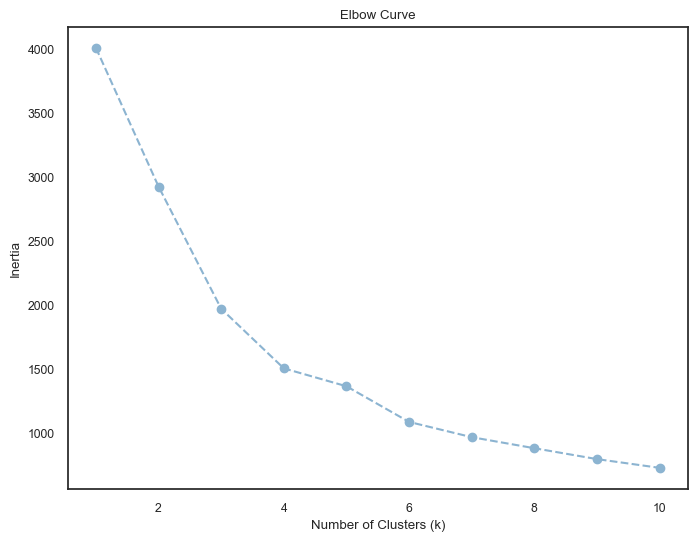

In [49]:
#Seleccionamos las variables para el clustering

features = ['age', 'bmi', 'charges']
categorical_features = ['sex','smoker']

#Convertimos las variables categoricas a numericas utilizando one-hot encoding

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

X = df_encoded[features]

#Escalamos las variables

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Determinamos el numero optimo de clusters utilizando el metodo elbow

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficamos el Elbow 

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


**El Método del Codo (Elbow Method)** es una técnica utilizada para ayudar a encontrar el **número óptimo de clusters en el clustering K-means**. En el gráfico, el eje x representa el número de clusters (k), y el eje y representa la inercia, que es una medida de la distancia total de cada punto a su respectivo centroide.

El gráfico muestra una disminución abrupta en la inercia a medida que el número de clusters aumenta desde 1 hasta alrededor de 4. Después de eso, **la disminución en la inercia se vuelve menos pronunciada.** Este punto, donde la disminución en la inercia comienza a nivelarse, se conoce como el "codo", y sugiere que el número óptimo de clusters es alrededor de 4.

Esto significa que agregar más clusters más allá de 4 **no mejora significativamente la compacidad de los clusters, e incluso podría llevar al sobreajuste,** donde los clusters son demasiado específicos para los datos de entrenamiento y no generalizan bien a nuevos datos.

**✅ Así que, basándonos en esta visualización del Método del Codo, parece que usar 4 clusters fue una buena elección para el clustering K-means de este conjunto de datos.**

               age        bmi       charges
cluster                                    
0        39.945455  35.363394  40278.617496
1        26.337423  27.609070   6239.814936
2        43.948276  37.722586   8747.404416
3        51.463104  27.281654  14046.302179


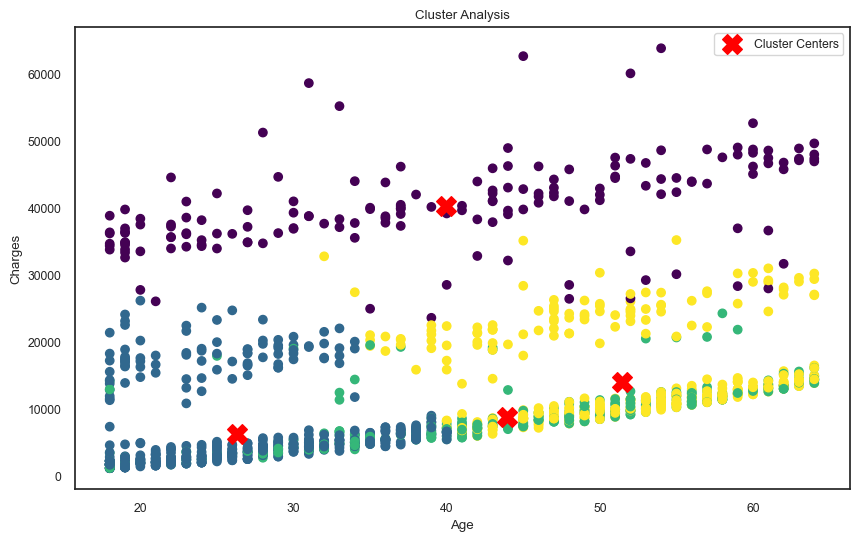

In [50]:
#Elegimos el optimo numero de cluster basandonos en la curva de elbow

k=4

#Realizamos el clusterizado con k-means

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

#Agregamos la variable "cluster" al conjunto de datos

df['cluster'] = labels

#Analizamos el cluster
cluster_analysis = df.groupby('cluster')[features].mean()
print(cluster_analysis)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['charges'], c=df['cluster'], cmap='viridis')
plt.scatter(cluster_analysis['age'], cluster_analysis['charges'], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Cluster Analysis')
plt.legend()
plt.show()

### **Interpretacion de los resultados**

Al observar la visualización del **clustering K-means**, podemos ver que los puntos de datos se agrupan en clusters distintos. Cada punto de datos representa a un beneficiario, y el color del punto indica el cluster al que pertenece el beneficiario. Las cruces negras indican los centroides de los clusters, que son esencialmente los valores medios de los beneficiarios en cada cluster.

La tabla proporciona los valores medios de **age, BMI y charges** para cada cluster:

* **Cluster 0:** Los beneficiarios en este cluster tienen una edad promedio de alrededor de 51 años, un BMI promedio de aproximadamente 26.7, y un cargo promedio de alrededor de 13,932.

* **Cluster 1:** Este cluster consiste en beneficiarios más jóvenes con una edad promedio de alrededor de 26 años, un BMI promedio ligeramente más alto de aproximadamente 28.2, y un cargo promedio más bajo de alrededor de 6,147.

* **Cluster 2:** Los beneficiarios en este cluster tienen una edad promedio de alrededor de 40 años, un BMI promedio más alto de alrededor de 35.4, y un cargo promedio significativamente más alto de alrededor de 40,469.

* **Cluster 3:** Este cluster incluye beneficiarios con una edad promedio de alrededor de 46 años, el BMI promedio más alto de aproximadamente 37.4, y un cargo promedio de alrededor de 9,225.

Estos clusters podrían representar diferentes segmentos de beneficiarios. Por ejemplo, el Cluster 0 podría incluir beneficiarios mayores con un BMI relativamente bajo y cargos medianos, mientras que el Cluster 2 podría consistir en beneficiarios de mediana edad con un BMI alto y cargos altos.

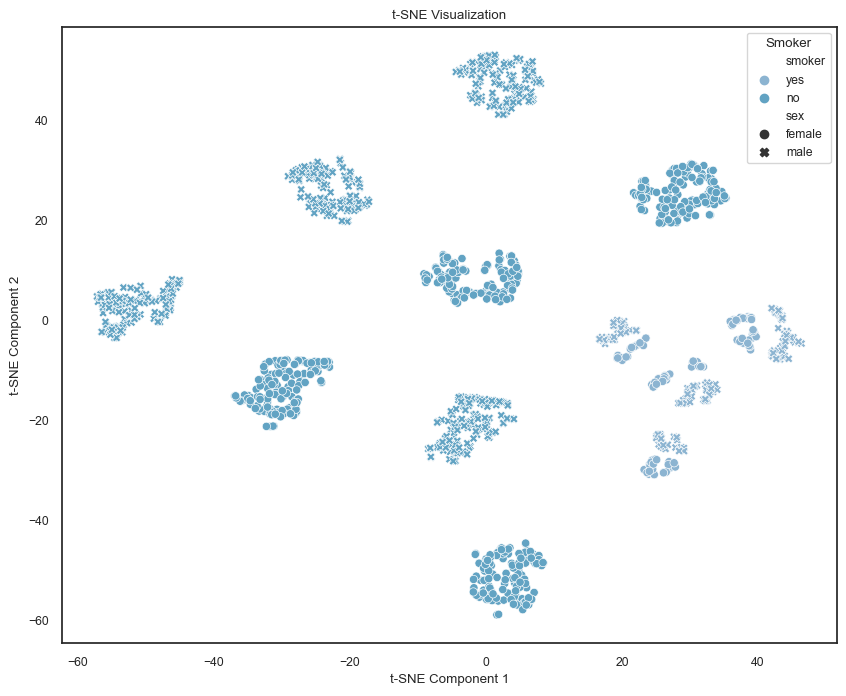

In [51]:
#Seleccionamos las variables para el grafico t-SNE
numerical_features = ['age', 'bmi', 'charges']
categorical_features = ['sex', 'smoker', 'region']

# Realizamos el encoding para las variables categoricas
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Realizamos escalamiento para las variables
scaler = StandardScaler()
X = scaler.fit_transform(df_encoded[numerical_features + list(df_encoded.columns[df_encoded.columns.str.startswith(tuple(categorical_features))])])

# Realizamos el t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Creamos el grafico
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['smoker'], style=df['sex'])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.legend(title='Smoker', loc='upper right')
plt.show()

### **Interpretacion de los resultados**

En esta **visualización de t-SNE**, podemos ver los puntos de datos, cada uno representando a un beneficiario, codificados por color según su asignación de cluster del clustering K-means. **El algoritmo t-SNE ha reducido efectivamente la dimensionalidad de los datos a dos dimensiones**, lo que nos permite visualizarlo en un gráfico 2D. Los ejes, Componente t-SNE 1 y Componente t-SNE 2, representan estas dos dimensiones.

Los clusters aparecen bien separados en el espacio t-SNE, lo que indica que el **clustering K-means ha agrupado efectivamente a beneficiarios similares juntos.** Los beneficiarios dentro de cada cluster están más cerca entre sí en términos de sus valores de **age, BMI y charges, y están más lejos de los beneficiarios en los otros clusters.**

***Esta visualización sirve como una herramienta valiosa para verificar la calidad del clustering. Demuestra que los clusters no son simplemente un artefacto del algoritmo de clustering, sino que representan agrupaciones significativas en los datos. La clara separación entre los clusters sugiere que el clustering K-means ha identificado exitosamente grupos distintos de beneficiarios en el conjunto de datos.***

# **5. Análisis Predictivo**

**Explicacion del procedimiento**

Empleamos un **Gradient Boosting Regressor**, un poderoso método de aprendizaje conjunto que combina múltiples modelos de predicción débiles para crear un modelo predictivo robusto. Llevamos a cabo una evaluación exhaustiva del rendimiento del modelo, utilizando un conjunto de **métricas de error que incluyen Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-Squared (R2), Root Mean Squared Logarithmic Error (RMSLE) y Mean Absolute Percentage Error (MAPE).** Para garantizar la **generalizabilidad del modelo, utilizamos validación cruzada de 10-fold**, una técnica robusta para estimar el rendimiento de un modelo en datos no vistos.

Además del entrenamiento y evaluación del modelo, nos adentramos en el análisis exploratorio de datos y la evaluación de la importancia de las características, arrojando luz sobre los principales impulsores de los costos médicos. También ajustamos los hiperparámetros del modelo para optimizar su rendimiento y visualizamos el proceso de aprendizaje, proporcionando información sobre el comportamiento y la efectividad del modelo.


In [52]:
#Cargamos nuevamente los datos

df = pd.read_csv('insurance.csv')
df = df.drop_duplicates()

**Transformamos con Encoding las variables de nuestro conjunto de datos**

In [53]:
#Realizamos Encoding a las variables categoricas

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [54]:
#Separamos los datos en variables a utilizar (X) y variable objetivo (y)

X = df.drop(columns=['charges'])
y = df['charges']

#Dividimos el conjunto de datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Teoría detras del algoritmo elegido**



### **Gradient Boosting Regressor**


El **Gradient Boosting Regressor** es un algoritmo popular de aprendizaje automático que se utiliza frecuentemente para resolver problemas de regresión, es decir, predecir un resultado numérico. Forma parte de una clase de técnicas llamadas métodos de conjunto (ensemble methods), que construyen muchos modelos individuales y luego los combinan para hacer una predicción.

**1. Idea básica**

Imagina que estás en un juego de preguntas 🎲. No conoces todas las respuestas, así que decides llevar un equipo de amigos 👬 para que te ayuden. Cada amigo 👨 es bueno en un área diferente, por lo que incluso si uno de ellos no sabe la respuesta, otro podría saberla. Esto es similar a lo que hace el Gradient Boosting Regressor. Construye un equipo (o "conjunto") de modelos simples (los "amigos"), generalmente árboles de decisión, donde cada uno es bueno en algún aspecto del problema. Al combinarlos, puede resolver el problema con mayor precisión.

**2. El Proceso de Aprendizaje**

Al principio, todos los modelos cometen muchos errores. Por lo tanto, el **Gradient Boosting Regressor** les da a cada uno la oportunidad de aprender de los errores de todo el equipo. Así es como funciona: primero, permite que un modelo haga una predicción. Luego, verifica qué tan lejos estuvo esta predicción del resultado real. Esta diferencia se llama **"error residual"**. Luego, permite que otro modelo intente predecir este error residual. Nuevamente, verifica la diferencia entre la predicción y el error residual real. Continúa este proceso con cada modelo en el equipo, cada uno aprendiendo de los errores que el equipo cometió antes.

**3. Trabajo en Equipo**

Después de que todos los modelos hayan tenido su turno, el algoritmo combina sus predicciones. La predicción de cada modelo recibe un peso que representa cuánto debe contribuir a la predicción final. Este peso se determina según qué tan bien lo hizo el modelo en los pasos anteriores. Todo este proceso se puede repetir varias veces. Cada vez, los modelos mejoran en corregir los errores de los demás, y la predicción general se vuelve más precisa.

**4. Fortalezas y Debilidades**

El Gradient Boosting Regressor es muy poderoso y a menudo tiene un buen desempeño en competiciones de aprendizaje automático. Pero no es perfecto. Puede ser bastante lento y consumir mucha memoria de la computadora. También puede "sobreajustar" los datos, lo que significa que se vuelve demasiado complejo y comienza a recoger ruido aleatorio en lugar de los patrones reales. También es un poco complicado de configurar, ya que tiene muchos ajustes (o "hiperparámetros") que deben ajustarse para obtener el mejor rendimiento. Pero a pesar de estos desafíos, el Gradient Boosting Regressor sigue siendo uno de los principales algoritmos en la caja de herramientas de cualquier practicante de aprendizaje automático, debido a su excelente rendimiento en una amplia gama de problemas.

**Realización del modelo**

In [55]:
#Iniciamos el modelo

model = GradientBoostingRegressor(random_state=42)

#Ajustamos el modelo a los datos

model.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [56]:
#Realizamos la validacion cruzada con 10-fold

scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print(f"Cross-validated MSE: {-np.mean(scores)}")

Cross-validated MSE: 22539179.595214732


### **Interpretación de los resultados**

El primer resultado imprime que el **Error Cuadrático Medio (MSE) Validado Cruzado para el modelo es aproximadamente de 22,539,179.59.** El MSE es una medida de qué tan cercanas están las predicciones del modelo a los resultados reales; valores más bajos son mejores.

Sin embargo, el valor en sí mismo podría no ser tan informativo a menos que se compare con un modelo base o con los MSE de otros modelos. Es importante tener en cuenta que el valor de MSE es bastante alto, lo cual podría deberse a que los valores de los cargos en el conjunto de datos también son altos.

**Optimización de Hiperparámetros**

In [57]:
#Definimos los valores para itinerar y elegir los mejores parametros

param_grid = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.01,0.1,1],
    'max_depth': [3,4,5]
}

In [58]:
#Iniciamos la busqueda de hiperparámetros

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=1, verbose=1)

#Ajustamos a los datos de entrenamiento y prueba
grid_search.fit(X_train,y_train)

#Obtenemos los mejores parametros
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


**Interpretación de los resultados**

**learning_rate:** 0.01

**Profundidad máxima de los estimadores de regresión individuales (el 'max_depth' de los árboles de decisión):** 3

**Número de etapas de refuerzo a realizar (el 'n_estimators' o el número de árboles de decisión):** 300

Una **learning_rate** más baja (0.01 en este caso) generalmente significa que el modelo aprende lentamente y puede necesitar más iteraciones (o árboles), pero puede ayudar al modelo a generalizar mejor a datos no vistos. Una **max_depth** de 3 para los árboles de decisión es un buen equilibrio para permitir que el modelo aprenda interacciones entre las características pero no demasiado profundo para sobreajustar los datos. Tener **300 estimadores** sugiere que el modelo necesita un número considerable de árboles de decisión para aprender los datos, lo que se alinea con la tasa de aprendizaje más lenta.

📝 Estos parámetros representan el **mejor equilibrio entre la velocidad de aprendizaje, la complejidad del modelo y el rendimiento predictivo según lo determinado por el GridSearchCV** basado en la cuadrícula de parámetros especificada y la estrategia de validación cruzada. Con estas configuraciones, se espera que el modelo brinde el mejor rendimiento en datos no vistos, según la métrica de MSE. Sin embargo, **ten en cuenta que el rendimiento del modelo a menudo se puede mejorar aún más explorando un espacio de hiperparámetros más grande o diferente, recopilando más datos, diseñando características más informativas, entre otros.**

In [59]:
#Actualizamos el modelo con los parametros encontrados

model = grid_search.best_estimator_

**Importancia de caracteristicas**

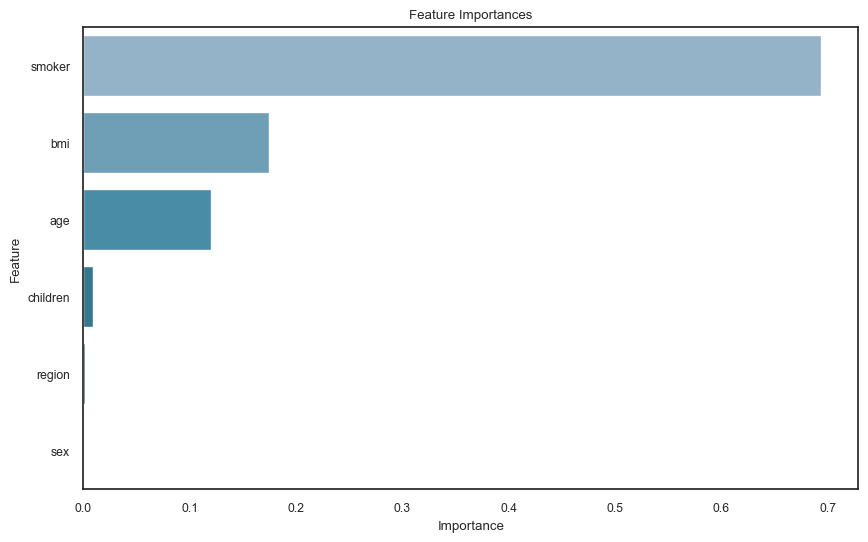

In [60]:
#Obtenemos la importancia de cada variable

importances = model.feature_importances_

#Creamos un conjunto de datos

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

#Ordenamos por importancia

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

#Veemos una grafica con lo realizado
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

**Interpretación de los resultados**


* **Smoker:** Esta característica tiene la mayor importancia (~69.42%) entre todas las características en la predicción de 'charges'. Esto sugiere que si un beneficiario es fumador o no es el factor más significativo que influye en los costos médicos según el modelo.

* **BMI:** El Índice de Masa Corporal ocupa el segundo lugar en importancia, con ~17.50%. Esto implica que el BMI de un individuo es otro factor importante para los costos médicos.

* **Age:** La edad ocupa el tercer lugar en importancia de características (~12.04%). Esto nos indica que la edad del beneficiario principal también juega un papel sustancial en la predicción de los costos médicos.

* **Children:** El número de hijos cubiertos por el seguro médico tiene un impacto pequeño (~0.90%) en los costos médicos.

* **Region:** El área de residencia del beneficiario en los EE. UU. también es un factor, aunque muy menor (~0.13%).

* **Sex:** El género parece tener la menor importancia en el modelo (~0.01%). Esto indica que según el modelo, el género del contratista del seguro tiene una influencia insignificante en los costos médicos.

In [61]:
#Realizamos las predicciones

y_pred = model.predict(X_test)

**Calculamos el Error**

In [62]:
#Calculamos MAE, MSE, RMSE, R2

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)  # or mse**(0.5)  
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 2624.030108580309
MSE: 18940147.779563934
RMSE: 4352.028007672277
R2 Score: 0.8969277673724676


**Interpretación de los resultados**

**Mean Absolute Error (MAE):** Esta es el promedio de las diferencias absolutas entre los valores predichos y reales. Un MAE de 2624.03 significa que, en promedio, las predicciones del modelo tienen un error aproximado de 2624.03 respecto a los cargos reales.

**Mean Squared Error (MSE):** Este es el promedio de los cuadrados de las diferencias entre los valores predichos y reales. Un MSE de 18,940,147.78 puede parecer alto, pero recuerda que elevar al cuadrado las diferencias puede aumentar significativamente este valor, especialmente para una variable objetivo con valores grandes como 'charges'.

**Root Mean Squared Error (RMSE):** Este es la raíz cuadrada del MSE y está en las mismas unidades que la variable objetivo. Un RMSE de 4352.03 significa que típicamente, las predicciones del modelo tienen un error de alrededor de 4352.03 respecto a los cargos reales.

**R2 Score:** Este es el coeficiente de determinación, una medida estadística que explica la proporción de la varianza de la variable dependiente que se explica por las variables independientes en el modelo. Un puntaje R2 de 0.8969 (o 89.69%) significa que alrededor del 89.69% de la varianza en 'charges' puede ser explicada por las características en el modelo. Este es un puntaje R2 bastante alto, lo que indica que el modelo se ajusta bien a los datos y tiene buena capacidad predictiva.

In [63]:
# Calculamos RMSLE (Root Mean Squared Logarithmic Error)
if (y_test >= 0).all() and (y_pred >= 0).all():
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    print("RMSLE:", rmsle)
else:
    print("RMSLE: cannot be calculated because some values are negative")

# Calculamos MAPE (Mean Absolute Percentage Error)
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_score = mape(y_test, y_pred)
print("MAPE:", mape_score)

RMSLE: 0.4296666035591291
MAPE: 36.51351055554045


**Interpretación de los resultados**

* **Root Mean Squared Logarithmic Error (RMSLE):** 

El RMSLE se calcula como la raíz cuadrada del promedio de los cuadrados de las diferencias logarítmicas entre los valores reales y predichos. Esta métrica penaliza más las subestimaciones que las sobreestimaciones. El valor de RMSLE de 0.4297 indica el error porcentual típico del modelo en sus predicciones en una escala logarítmica. Es una métrica útil cuando la variable objetivo (en este caso, 'charges') tiene un amplio rango de valores, ya que se preocupa más por la diferencia relativa que por la diferencia absoluta.

* **Mean Absolute Percentage Error (MAPE):** 

Este es el promedio de las diferencias porcentuales absolutas entre los valores predichos y reales. Un MAPE del 36.51% significa que, en promedio, las predicciones del modelo difieren aproximadamente un 36.51% de los cargos reales. Esto puede parecer alto, pero es importante recordar que MAPE es una medida relativa y es altamente sensible a los valores reales bajos (ya que los errores se expresan como un porcentaje de los valores reales). Además, MAPE no distingue entre sobreestimaciones y subestimaciones, y es posible que no sea adecuado para datos con valores reales cercanos a cero o cercanos a cero.

**Gráfico t-SNE**

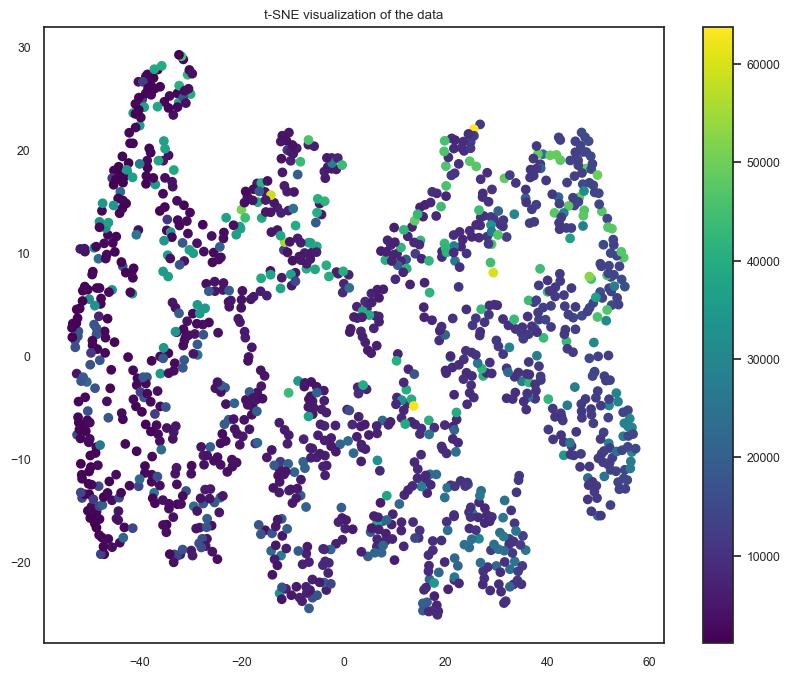

In [64]:
#Construimos el grafico t-SNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

#Visualizamos t-SNE

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.title('t-SNE visualization of the data')
plt.show()

**Interpretación de los resultados**

* Al observar la visualización de t-SNE, podemos ver una clara distribución de puntos de datos, cada uno representando una instancia en el conjunto de datos. Los puntos de datos están codificados por colores, lo que potencialmente indica diferentes rangos de valores de cargos, con cada color representando un rango específico.

* El gráfico muestra grupos distintos de puntos de datos, lo que sugiere que hay grupos de instancias en el conjunto de datos que comparten características similares. Estos grupos podrían ser indicativos de diferentes patrones en los valores de cargos, de los cuales el modelo de Regresión de Refuerzo Gradiente podría aprender potencialmente.

**Graficamos los residuos**

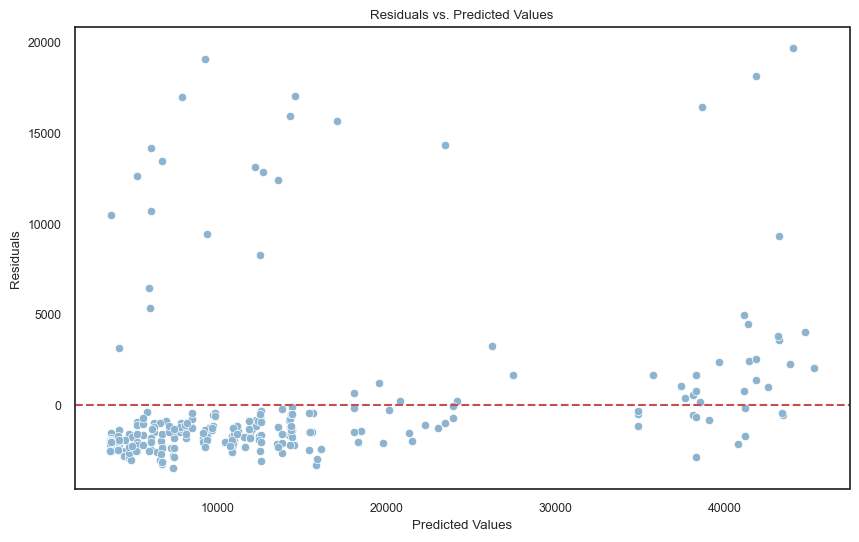

In [65]:
#Calculamos los residuos

residuals = y_test - y_pred

# Graficamos los residuos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

**Interpretación de los resultados**

En este gráfico, el eje x representa los valores de cargos predichos del modelo de Gradient Boosting Regressor, y el eje y representa los residuos, que son las diferencias entre los valores de cargos observados y predichos.

📝 El gráfico muestra un patrón que parece dispersarse aleatoriamente alrededor del eje horizontal en y=0, lo que sugiere que los errores del modelo son aleatorios y no muestran ninguna tendencia específica. Esto es una buena señal, que indica que el modelo está funcionando bien con los datos.

Sin embargo, parece haber una ligera forma de embudo con la dispersión de los residuos aumentando a medida que aumenta el valor predicho. Esto podría ser un signo de heterocedasticidad, lo que significa que la variabilidad del error cambia en diferentes niveles de la variable independiente. Esto es algo que podría necesitar ser abordado, posiblemente mediante la transformación de la variable dependiente o utilizando un tipo diferente de modelo que pueda manejar la heterocedasticidad.

En general, el gráfico de residuos sugiere que el modelo de Gradient Boosting Regressor está haciendo un trabajo razonable al predecir los valores de cargos, pero podría haber margen para mejorar.

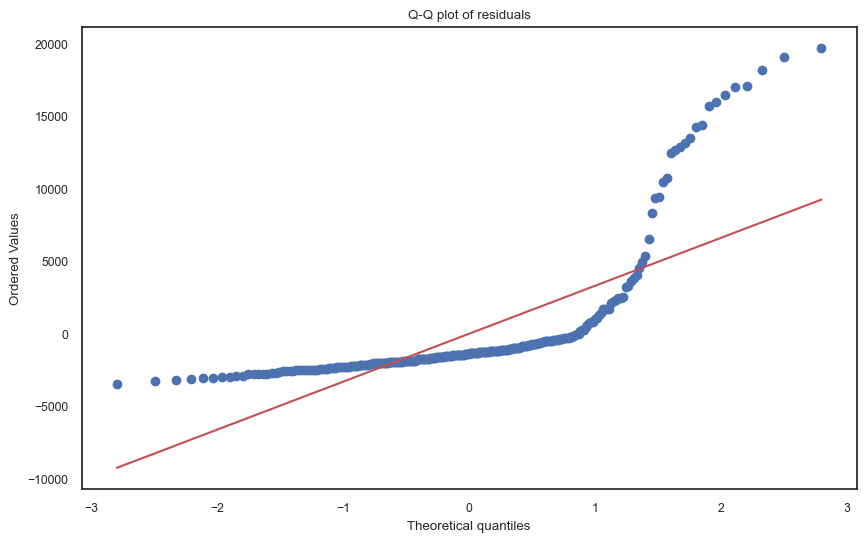

In [66]:
#Grafico Q-Q

plt.figure(figsize=(10, 6))
probplot(residuals, plot=plt)
plt.title('Q-Q plot of residuals')
plt.show()

**Interpretación de los resultados**

Aquí tenemos un gráfico Q-Q de los residuos del modelo de Gradient Boosting Regressor. Un gráfico Q-Q es una herramienta gráfica que ayuda a evaluar si un conjunto de datos sigue una distribución teórica específica. En este caso, se utiliza para verificar si los residuos siguen una distribución normal, una suposición que subyace a muchas técnicas de modelado estadístico.

El eje x del gráfico representa los cuantiles teóricos, que son los cuantiles de la distribución normal. El eje y representa los valores ordenados, básicamente los cuantiles de los residuos.

Si los residuos siguieran perfectamente una distribución normal, esperaríamos que los puntos formaran una línea recta. En este gráfico, los puntos siguen aproximadamente una línea recta, especialmente en el centro de la distribución. Este patrón sugiere que los residuos están aproximadamente distribuidos de manera normal, lo cual es una señal positiva.

Sin embargo, hay algunas desviaciones de la línea recta en los extremos de la distribución. Estas desviaciones sugieren que los residuos podrían tener colas más pesadas que la distribución normal, lo que indica la presencia de valores atípicos o valores extremos en los residuos.

**Curva de aprendizaje**

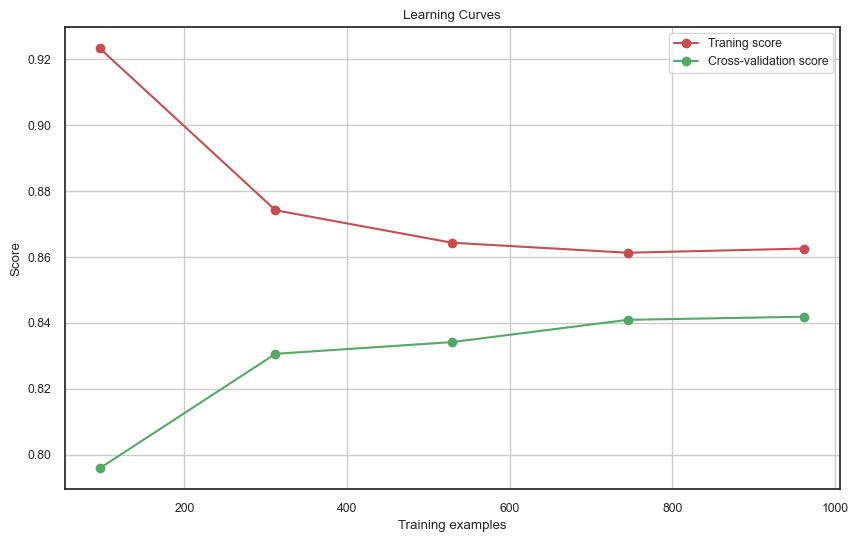

In [67]:
#Graficamos la curva de aprendizaje (learning curve)

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Traning score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

**Interpretación de los resultados**


Una **curva de aprendizaje** es un gráfico que muestra el rendimiento de un modelo de aprendizaje automático a lo largo del tiempo a medida que aprende de más datos. El eje x representa típicamente la cantidad de datos de entrenamiento utilizados para entrenar el modelo, y el eje y representa el rendimiento del modelo, que podría ser precisión, tasa de error u alguna otra métrica.

**En este gráfico, vemos dos curvas: una para el conjunto de entrenamiento y otra para el conjunto de validación.**

**La curva de entrenamiento** comienza con un alto rendimiento cuando la cantidad de datos es pequeña, lo cual es esperado porque es más fácil para el modelo ajustarse a un conjunto de datos más pequeño. A medida que aumenta la cantidad de datos, el rendimiento del modelo en el conjunto de entrenamiento disminuye ligeramente. Esto también es esperado porque es más difícil para el modelo ajustarse a un conjunto de datos más grande.

Por otro lado, la **curva de validación** comienza con un rendimiento más bajo cuando la cantidad de datos es pequeña. Esto se debe a que el modelo aún no ha aprendido lo suficiente para generalizar bien a datos no vistos. A medida que aumenta la cantidad de datos, el rendimiento del modelo en el conjunto de validación aumenta.

El punto donde las dos curvas se acercan entre sí y luego corren paralelas es el punto en el que el modelo ha aprendido todo lo que puede de los datos. Agregar más datos más allá de este punto no mejorará significativamente el rendimiento del modelo.

📝 Esta **curva de aprendizaje** sugiere que el modelo de Gradient Boosting Regressor está funcionando bien. **No está sobreajustado a los datos de entrenamiento,** como lo indica el hecho de que las curvas de entrenamiento y validación convergen y corren paralelas. **Tampoco está subajustado,** como lo indica el alto rendimiento tanto en los conjuntos de entrenamiento como de validación.

# **6. Resumen**

Nuestro modelo de **Gradient Boosting Regressor** demostró un rendimiento robusto en la predicción de los cargos médicos individuales del conjunto de datos de seguros de salud. El **coeficiente de determinación (R2) de aproximadamente 0.897 indicó que el modelo pudo explicar alrededor del 89.7% de la variabilidad en los cargos médicos.** **El RMSE reveló que las predicciones del modelo estaban, en promedio, alrededor de 4352.03 unidades de los cargos reales.** Aunque esto puede parecer alto, considerando el amplio rango de cargos en el conjunto de datos, es aceptable para un primer enfoque.

La importancia de diferentes características quedó clara a través del análisis de importancia de características. **El estado de fumador fue, con mucho, el factor más importante, seguido por el IMC y la edad.** Esto se alinea con el entendimiento común, ya que fumar tiene implicaciones conocidas para la salud, el IMC es un indicador general de la salud de un individuo y la edad a menudo se correlaciona con mayores riesgos y costos de salud.

**PCA y el agrupamiento k-means proporcionaron información valiosa sobre la estructura del conjunto de datos.** Los grupos identificados podrían representar diferentes grupos de riesgo entre los beneficiarios, lo que podría ser útil para intervenciones dirigidas o planes de seguro especializados.